# Test 2 with Optuna optimization

In [2]:
%load_ext autoreload
%autoreload
from test2 import *

import optuna
# Limit the verbosity of Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

## 1. HillClimbing Radar

C:\Users\allem\OneDrive - Université Libre de Bruxelles\MA2-IRIFS\Q1\MEMOIRE\Thesis - Temp repository\neighborhoods\Radar.py:159: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: inflation_vector_max_perturbation / (1 + np.exp(-x))
C:\Users\allem\OneDrive - Université Libre de Bruxelles\MA2-IRIFS\Q1\MEMOIRE\Thesis - Temp repository\neighborhoods\Radar.py:162: RuntimeWarning: overflow encountered in double_scalars
  perturbation_weights = [perturbation_weights[i] * dynamic_perturbation_factor * sigmoid(inflation_vector[i]) for i in range(len(x))]
C:\Users\allem\OneDrive - Université Libre de Bruxelles\MA2-IRIFS\Q1\MEMOIRE\Thesis - Temp repository\neighborhoods\Radar.py:162: RuntimeWarning: invalid value encountered in double_scalars
  perturbation_weights = [perturbation_weights[i] * dynamic_perturbation_factor * sigmoid(inflation_vector[i]) for i in range(len(x))]


Best parameters: {'num_samples': 2, 'patience': 1, 'static_perturbation_factor': 8.761972261623832, 'dynamic_perturbation_factor': 1.5013214358689666, 'inflation_vector_max_perturbation': 76.80169395918497}
Best total queries: 50.0


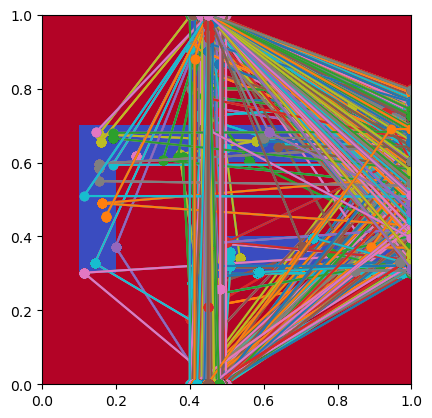

In [2]:
number_of_tests = 3 # repeat each configuration 3 times and take mean values

def objective(trial):
    # Define the parameter search space for Optuna
    num_samples = trial.suggest_int("num_samples", 1, 10)
    patience = trial.suggest_int("patience", 1, 1000)
    static_perturbation_factor = trial.suggest_float("static_perturbation_factor", 1e-6, 10)
    dynamic_perturbation_factor = trial.suggest_float("dynamic_perturbation_factor", 1.0, 10.0)
    inflation_vector_max_perturbation = trial.suggest_float("inflation_vector_max_perturbation", 1.0, 100.0)

    # Initialize the attack
    attack = HillClimbing(estimator=Model2(), verbose=0)
    neighborhood = Radar(constraints)
    
    # Try running the test with selected parameters
    try:
        score = list()
        queries = list()
        for _ in range(number_of_tests):
            _, s, _, q = run_test(
                test_id=2,
                verbose=False,
                show_graph=False,
                save_graph=False,
                num_samples=num_samples,
                attack=attack,
                neighborhood=neighborhood,
                targeted=True,
                specific_class=0,
                patience=patience,
                cost_function=Cost2,
                static_perturbation_factor=static_perturbation_factor,
                dynamic_perturbation_factor=dynamic_perturbation_factor,
                enable_negative_inflation_vector=True,
                inflation_vector_max_perturbation=inflation_vector_max_perturbation
            )
            score.append(s)
            queries.append(q)
        sc = np.mean(score)
        total_queries = np.mean(queries)
        if sc < 1.0:
            return float("inf")
    except Exception as e:
        return float("inf")  # Return a high value if an error occurs

    return total_queries  # Objective to minimize

# Create and run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

# Print the best parameters and result
print("Best parameters:", study.best_params)
print("Best total queries:", study.best_value)

In [3]:
optuna.importance.get_param_importances(study)

{'patience': 0.9213978007677848,
 'inflation_vector_max_perturbation': 0.03695260153429403,
 'num_samples': 0.031508803844344645,
 'dynamic_perturbation_factor': 0.008906517400846968,
 'static_perturbation_factor': 0.0012342764527295917}

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

Score: 1.0
Total time: 0.04199624061584473
Number of queries: 60


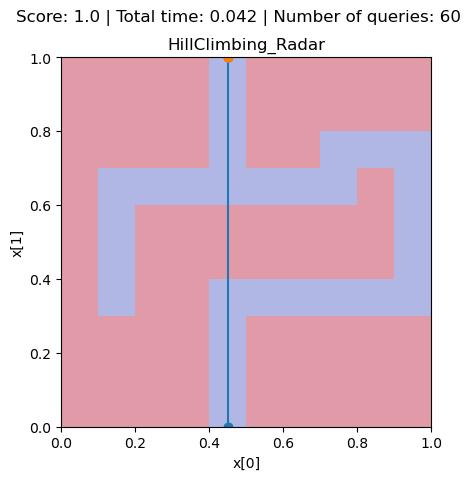

Final run results:
Score: 1.0
Total time: 0.04199624061584473
Total queries: 60


In [4]:
# Retrieve the best parameters from the Optuna study
best_params = study.best_params

# Run the test with verbose output and graph options enabled
_, score, total_time, total_queries = run_test(
    test_id=2,
    verbose=True,
    show_graph=True,
    save_graph=True,
    num_samples=best_params["num_samples"],
    attack=HillClimbing(estimator=Model2(), verbose=1),
    neighborhood=Radar(constraints),
    targeted=True,
    specific_class=0,
    patience=best_params["patience"],
    cost_function=Cost2,
    static_perturbation_factor=best_params["static_perturbation_factor"],
    dynamic_perturbation_factor=best_params["dynamic_perturbation_factor"],
    enable_negative_inflation_vector=True,
    inflation_vector_max_perturbation=best_params["inflation_vector_max_perturbation"]
)

# Display results
print("Final run results:")
print("Score:", score)
print("Total time:", total_time)
print("Total queries:", total_queries)

## 2. SimulatedAnnealing Radar

Score: 1.0
Total time: 0.7077817916870117
Number of queries: 21442


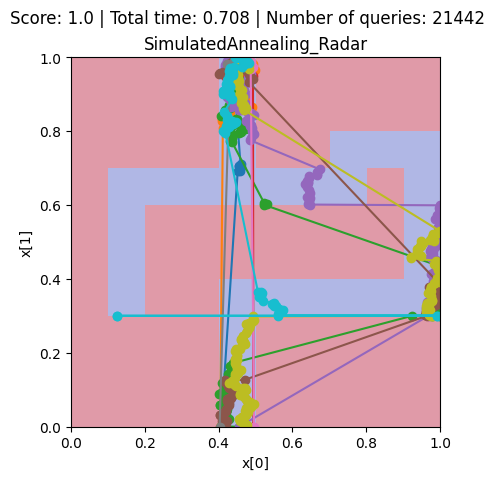

(np.float64(0.2), np.float64(1.0), 0.7077817916870117, 21442)

In [40]:
%autoreload
run_test(attack=SimulatedAnnealing(estimator=Model2(), verbose=0), dynamic_perturbation_factor=1.1, static_perturbation_factor=0.01, patience=1000, cooling_rate=0.99, name="SimulatedAnnealing_Radar")

C:\Users\allem\OneDrive - Université Libre de Bruxelles\MA2-IRIFS\Q1\MEMOIRE\Thesis - Temp repository\neighborhoods\Radar.py:159: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: inflation_vector_max_perturbation / (1 + np.exp(-x))


Best parameters: {'static_perturbation_factor': 84.0079329278683, 'dynamic_perturbation_factor': 4.209843243917682, 'patience': 926, 'initial_temperature': 4228.753088396341, 'final_temperature': 0.7482759059281533, 'cooling_rate': 0.871593298332577, 'inflation_vector_max_perturbation': 88.77177706323344}
Best total queries: 10.2


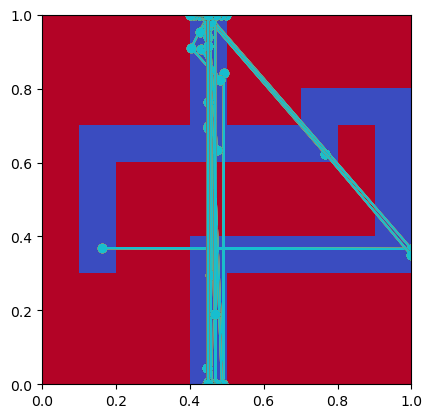

In [6]:
number_of_tests = 10 # repeat each configuration 3 times and take mean values

def objective(trial):
    # Define the parameter search space for Optuna
    static_perturbation_factor = trial.suggest_float(
        "static_perturbation_factor", 1e-8, 100, log=False
    )
    dynamic_perturbation_factor = trial.suggest_float(
        "dynamic_perturbation_factor", 1.0, 5.0
    )
    patience = trial.suggest_int("patience", 1, 1000)
    initial_temperature = trial.suggest_float(
        "initial_temperature", 1.0, 10000.0, log=False
    )
    final_temperature = trial.suggest_float(
        "final_temperature", 1e-12, 0.99, log=False
    )
    cooling_rate = trial.suggest_float("cooling_rate", 0.50, 0.999)
    inflation_vector_max_perturbation = trial.suggest_float(
        "inflation_vector_max_perturbation", 1.0, 100.0
    )

    # Initialize the attack
    attack = SimulatedAnnealing(estimator=Model2(), verbose=0)
    neighborhood = Radar(constraints)
    
    # Try running the test with selected parameters
    try:
        score = list()
        queries = list()
        for _ in range(number_of_tests):
            _, s, _, q = run_test(
                test_id=2,
                name="SimulatedAnnealing_Radar",
                verbose=False,
                show_graph=False,
                save_graph=False,
                num_samples=1,
                attack=attack,
                neighborhood=neighborhood,
                targeted=True,
                specific_class=0,
                patience=patience,
                cost_function=Cost2,
                static_perturbation_factor=static_perturbation_factor,
                dynamic_perturbation_factor=dynamic_perturbation_factor,
                enable_negative_inflation_vector=True,
                inflation_vector_max_perturbation=inflation_vector_max_perturbation,
                
                initial_temperature=initial_temperature,
                final_temperature=final_temperature,
                cooling_rate=cooling_rate,
            )
            score.append(s)
            queries.append(q)
        sc = np.mean(score)
        total_queries = np.mean(queries)
        if sc < 1.0:
            return float("inf")
    except Exception as e:
        print(e)
        return float("inf")  # Return a high value if an error occurs

    return total_queries  # Objective to minimize

# Create and run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

# Print the best parameters and result
print("Best parameters:", study.best_params)
print("Best total queries:", study.best_value)

In [7]:
optuna.importance.get_param_importances(study)

{'static_perturbation_factor': 0.5009241261059508,
 'inflation_vector_max_perturbation': 0.1275296600645137,
 'cooling_rate': 0.12008126840569622,
 'dynamic_perturbation_factor': 0.11217955808329735,
 'patience': 0.09897450670482733,
 'final_temperature': 0.02055871528273054,
 'initial_temperature': 0.01975216535298406}

In [3]:
# Retrieve the best parameters from the Optuna study
best_params = study.best_params

# Run the test with verbose output and graph options enabled
_, score, total_time, total_queries = run_test(
    test_id=2,
    name="SimulatedAnnealing_Radar",
    verbose=True,
    show_graph=True,
    save_graph=True,
    num_samples=1,
    attack=SimulatedAnnealing(estimator=Model2(), verbose=1),
    neighborhood=Radar(constraints),
    targeted=True,
    specific_class=0,
    patience=best_params["patience"],
    cost_function=Cost2,
    static_perturbation_factor=best_params["static_perturbation_factor"],
    dynamic_perturbation_factor=best_params["dynamic_perturbation_factor"],
    enable_negative_inflation_vector=True,
    inflation_vector_max_perturbation=best_params["inflation_vector_max_perturbation"],
    
    initial_temperature=best_params["initial_temperature"],
    final_temperature=best_params["final_temperature"],
    cooling_rate=best_params["cooling_rate"],
)

# Display results
print("Final run results:")
print("Score:", score)
print("Total time:", total_time)
print("Total queries:", total_queries)

NameError: name 'study' is not defined

# 3. TabuSeach Radar

c:\Users\allem\OneDrive - Université Libre de Bruxelles\MA2-IRIFS\Q1\MEMOIRE\Thesis - Temp repository\tests\..\neighborhoods\Radar.py:210: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: inflation_vector_max_perturbation / (1 + np.exp(-x))


Score: 0.10455897269144776
Total time: 7.9154746532440186
Number of queries: 74550


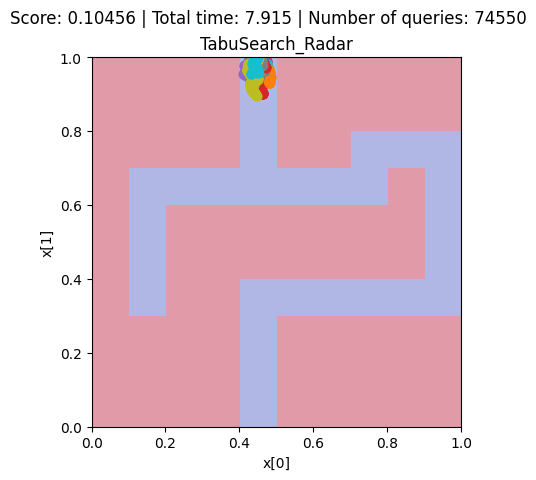

(np.float64(1.0954410273085522),
 np.float64(0.10455897269144776),
 7.9154746532440186,
 74550)

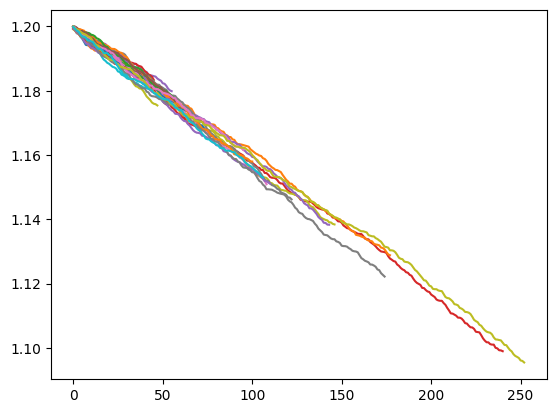

In [16]:
run_test(attack=TabuSearch(estimator=Model2(), verbose=0), name="TabuSearch_Radar", num_samples=30, plot_history=True,
         static_perturbation_factor=0.001, patience=1000)

C:\Users\allem\OneDrive - Université Libre de Bruxelles\MA2-IRIFS\Q1\MEMOIRE\Thesis - Temp repository\neighborhoods\Radar.py:162: RuntimeWarning: overflow encountered in double_scalars
  perturbation_weights = [perturbation_weights[i] * dynamic_perturbation_factor * sigmoid(inflation_vector[i]) for i in range(len(x))]
C:\Users\allem\OneDrive - Université Libre de Bruxelles\MA2-IRIFS\Q1\MEMOIRE\Thesis - Temp repository\neighborhoods\Radar.py:162: RuntimeWarning: invalid value encountered in double_scalars
  perturbation_weights = [perturbation_weights[i] * dynamic_perturbation_factor * sigmoid(inflation_vector[i]) for i in range(len(x))]


Best parameters: {'static_perturbation_factor': 32.9353099820059, 'dynamic_perturbation_factor': 4.760596695453105, 'patience': 2, 'tabu_tenure': 29, 'max_tabu_size': 71, 'similarity_epsilon': 3.9023189746936644e-05, 'inflation_vector_max_perturbation': 91.04565031493573}
Best total queries: 14.333333333333334


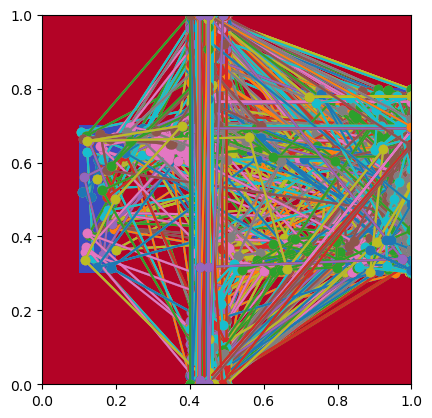

In [10]:
number_of_tests = 3 # repeat each configuration n times and take mean values

def objective(trial):
    # Define the parameter search space for Optuna
    static_perturbation_factor = trial.suggest_float(
        "static_perturbation_factor", 1e-8, 100, log=True
    )
    dynamic_perturbation_factor = trial.suggest_float(
        "dynamic_perturbation_factor", 1.0, 5.0
    )
    patience = trial.suggest_int("patience", 1, 1000)
    tabu_tenure = trial.suggest_int("tabu_tenure", 5, 50)
    max_tabu_size = trial.suggest_int("max_tabu_size", 50, 500)
    similarity_epsilon = trial.suggest_float(
        "similarity_epsilon", 1e-8, 1, log=True
    )
    
    inflation_vector_max_perturbation = trial.suggest_float(
        "inflation_vector_max_perturbation", 1.0, 100.0
    )

    # Initialize the attack
    attack = TabuSearch(estimator=Model2(), verbose=0)
    neighborhood = Radar(constraints)
    
    # Try running the test with selected parameters
    try:
        score = list()
        queries = list()
        for _ in range(number_of_tests):
            _, s, _, q = run_test(
                test_id=2,
                name="TabuSearch_Radar",
                verbose=False,
                show_graph=False,
                save_graph=False,
                num_samples=1,
                attack=attack,
                neighborhood=neighborhood,
                targeted=True,
                specific_class=0,
                patience=patience,
                cost_function=Cost2,
                static_perturbation_factor=static_perturbation_factor,
                dynamic_perturbation_factor=dynamic_perturbation_factor,
                enable_negative_inflation_vector=True,
                inflation_vector_max_perturbation=inflation_vector_max_perturbation,
                
                tabu_tenure=tabu_tenure,
                max_tabu_size=max_tabu_size,
                similarity_epsilon=similarity_epsilon,
            )
            score.append(s)
            queries.append(q)
        sc = np.mean(score)
        total_queries = np.mean(queries)
        if sc < 1.0:
            return float("inf")
    except Exception as e:
        return float("inf")  # Return a high value if an error occurs

    return total_queries  # Objective to minimize

# Create and run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

# Print the best parameters and result
print("Best parameters:", study.best_params)
print("Best total queries:", study.best_value)

In [11]:
optuna.importance.get_param_importances(study)

{'patience': 0.6913953165439117,
 'max_tabu_size': 0.09269541412167419,
 'dynamic_perturbation_factor': 0.08720910624731211,
 'tabu_tenure': 0.0827236384770086,
 'inflation_vector_max_perturbation': 0.04184019334199568,
 'static_perturbation_factor': 0.004120842542559594,
 'similarity_epsilon': 1.5488725538079978e-05}

  0%|          | 0/100000 [00:00<?, ?it/s]

Score: 1.0
Total time: 0.02200031280517578
Number of queries: 65


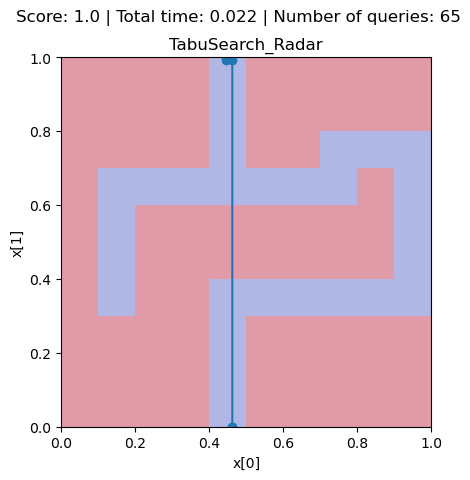

Final run results:
Score: 1.0
Total time: 0.02200031280517578
Total queries: 65


In [13]:
# Retrieve the best parameters from the Optuna study
best_params = study.best_params

# Run the test with verbose output and graph options enabled
_, score, total_time, total_queries = run_test(
    test_id=2,
    name="TabuSearch_Radar",
    verbose=True,
    show_graph=True,
    save_graph=True,
    num_samples=1,
    attack=TabuSearch(estimator=Model2(), verbose=1),
    neighborhood=Radar(constraints),
    targeted=True,
    specific_class=0,
    patience=best_params["patience"],
    cost_function=Cost2,
    static_perturbation_factor=best_params["static_perturbation_factor"],
    dynamic_perturbation_factor=best_params["dynamic_perturbation_factor"],
    enable_negative_inflation_vector=True,
    inflation_vector_max_perturbation=best_params["inflation_vector_max_perturbation"],
    
    tabu_tenure=best_params["tabu_tenure"],
    max_tabu_size=best_params["max_tabu_size"],
    similarity_epsilon=best_params["similarity_epsilon"],
)

# Display results
print("Final run results:")
print("Score:", score)
print("Total time:", total_time)
print("Total queries:", total_queries)